In [144]:
from operator import attrgetter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

In [145]:
df = pd.read_csv('Data Set 2.csv',thousands=',')
df.head()

,id,customer_id,location_id,channel,amount,bill_no,created_on
0,42877344,60,192,uber,1039,GGN001-24323,24-06-2018 00:00
1,35625005,134,535,takeaway,1029,DEL007-1522,14-01-2018 19:21
2,44397299,166,347,uber,355,DEL005-29173,13-09-2018 13:40
3,44405460,166,347,uber,371,DEL005-29180,13-09-2018 14:33
4,44717004,166,347,uber,371,DEL005-29603,16-09-2018 12:40


In [146]:
df.dtypes

id              int64
customer_id     int64
location_id     int64
channel        object
amount         object
bill_no        object
created_on     object
dtype: object

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533327 entries, 0 to 533326
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           533327 non-null  int64 
 1   customer_id  533327 non-null  int64 
 2   location_id  533327 non-null  int64 
 3   channel      533327 non-null  object
 4   amount       533327 non-null  object
 5   bill_no      533327 non-null  object
 6   created_on   533327 non-null  object
dtypes: int64(3), object(4)
memory usage: 28.5+ MB


In [148]:
df['billed_date'] = pd.to_datetime(df['created_on'], infer_datetime_format=True)
df

,id,customer_id,location_id,channel,amount,bill_no,created_on,billed_date
0,42877344,60,192,uber,1039,GGN001-24323,24-06-2018 00:00,2018-06-24 00:00:00
1,35625005,134,535,takeaway,1029,DEL007-1522,14-01-2018 19:21,2018-01-14 19:21:00
2,44397299,166,347,uber,355,DEL005-29173,13-09-2018 13:40,2018-09-13 13:40:00
3,44405460,166,347,uber,371,DEL005-29180,13-09-2018 14:33,2018-09-13 14:33:00
4,44717004,166,347,uber,371,DEL005-29603,16-09-2018 12:40,2018-09-16 12:40:00
...,...,...,...,...,...,...,...,...
533322,63920571,11655184,218,zomato,674,GGN004-49266,10/4/2019 14:21,2019-10-04 14:21:00
533323,63920575,11655185,4002,dine in,1565,DEL009-26660,10/4/2019 10:11,2019-10-04 10:11:00
533324,63920583,11655186,194,zomato,217,GGN002-70779,10/4/2019 15:44,2019-10-04 15:44:00
533325,63920586,11655187,192,uber,252,GGN001-88302,10/4/2019 16:21,2019-10-04 16:21:00


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533327 entries, 0 to 533326
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           533327 non-null  int64         
 1   customer_id  533327 non-null  int64         
 2   location_id  533327 non-null  int64         
 3   channel      533327 non-null  object        
 4   amount       533327 non-null  object        
 5   bill_no      533327 non-null  object        
 6   created_on   533327 non-null  object        
 7   billed_date  533327 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 32.6+ MB


In [164]:
print(df['billed_date'].max(),' ',df['billed_date'].min())

2019-12-03 22:46:00   2018-01-01 00:00:00


In [150]:
n_orders = df.groupby(['customer_id'])['bill_no'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / df['customer_id'].nunique()
print(mult_orders_perc*100)

35.82726847038469


<AxesSubplot:xlabel='channel'>

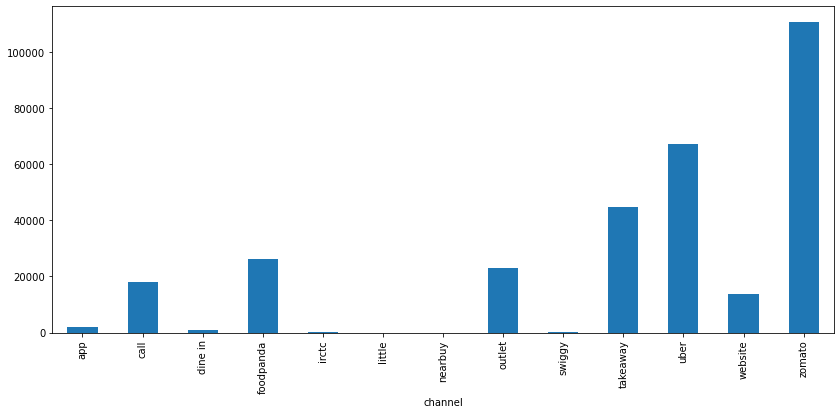

In [151]:
df.groupby(['channel'])['customer_id'].nunique().plot(kind='bar',figsize=(14,6))

In [152]:
df['billed_month'] = df['billed_date'].dt.to_period('M')                                   # billed month
df['cohort'] = df.groupby('customer_id')['billed_date'].transform('min').dt.to_period('M') # first billed date
df

,id,customer_id,location_id,channel,amount,bill_no,created_on,billed_date,billed_month,cohort
0,42877344,60,192,uber,1039,GGN001-24323,24-06-2018 00:00,2018-06-24 00:00:00,2018-06,2018-06
1,35625005,134,535,takeaway,1029,DEL007-1522,14-01-2018 19:21,2018-01-14 19:21:00,2018-01,2018-01
2,44397299,166,347,uber,355,DEL005-29173,13-09-2018 13:40,2018-09-13 13:40:00,2018-09,2018-09
3,44405460,166,347,uber,371,DEL005-29180,13-09-2018 14:33,2018-09-13 14:33:00,2018-09,2018-09
4,44717004,166,347,uber,371,DEL005-29603,16-09-2018 12:40,2018-09-16 12:40:00,2018-09,2018-09
...,...,...,...,...,...,...,...,...,...,...
533322,63920571,11655184,218,zomato,674,GGN004-49266,10/4/2019 14:21,2019-10-04 14:21:00,2019-10,2019-10
533323,63920575,11655185,4002,dine in,1565,DEL009-26660,10/4/2019 10:11,2019-10-04 10:11:00,2019-10,2019-10
533324,63920583,11655186,194,zomato,217,GGN002-70779,10/4/2019 15:44,2019-10-04 15:44:00,2019-10,2019-10
533325,63920586,11655187,192,uber,252,GGN001-88302,10/4/2019 16:21,2019-10-04 16:21:00,2019-10,2019-10


In [153]:
df_cohort = df.groupby(['cohort', 'billed_month']).agg(n_customers=('customer_id', 'nunique')).reset_index(drop=False)
df_cohort

,cohort,billed_month,n_customers
0,2018-01,2018-01,22314
1,2018-01,2018-02,4079
2,2018-01,2018-03,3744
3,2018-01,2018-04,3731
4,2018-01,2018-05,3339
...,...,...,...
295,2019-10,2019-11,18
296,2019-10,2019-12,23
297,2019-11,2019-11,1257
298,2019-11,2019-12,14


In [154]:
df_cohort['period_number'] = (df_cohort.billed_month - df_cohort.cohort).apply(attrgetter('n'))
df_cohort

,cohort,billed_month,n_customers,period_number
0,2018-01,2018-01,22314,0
1,2018-01,2018-02,4079,1
2,2018-01,2018-03,3744,2
3,2018-01,2018-04,3731,3
4,2018-01,2018-05,3339,4
...,...,...,...,...
295,2019-10,2019-11,18,1
296,2019-10,2019-12,23,2
297,2019-11,2019-11,1257,0
298,2019-11,2019-12,14,1


In [155]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',columns = 'period_number',values = 'n_customers')
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
cohort,,,,,,,,,,,,,,,,,,,,,
2018-01,22314.0,4079.0,3744.0,3731.0,3339.0,3691.0,3573.0,3311.0,3502.0,3355.0,...,2143.0,420.0,530.0,493.0,405.0,501.0,494.0,502.0,356.0,351.0
2018-02,17509.0,2014.0,2016.0,1901.0,1934.0,1957.0,1759.0,1994.0,1944.0,2163.0,...,218.0,291.0,283.0,252.0,303.0,259.0,296.0,195.0,202.0,NaN
2018-03,13437.0,1481.0,1307.0,1329.0,1274.0,1182.0,1258.0,1247.0,1393.0,1158.0,...,187.0,155.0,161.0,189.0,179.0,177.0,113.0,124.0,NaN,NaN
2018-04,13317.0,1139.0,1127.0,1111.0,960.0,1054.0,1024.0,1134.0,1030.0,589.0,...,138.0,134.0,153.0,127.0,131.0,103.0,98.0,NaN,NaN,NaN
2018-05,13483.0,1084.0,1038.0,890.0,962.0,950.0,1025.0,930.0,560.0,572.0,...,131.0,143.0,122.0,122.0,90.0,80.0,NaN,NaN,NaN,NaN
2018-06,15627.0,1118.0,922.0,1001.0,997.0,1117.0,960.0,544.0,615.0,731.0,...,128.0,145.0,141.0,105.0,107.0,NaN,NaN,NaN,NaN,NaN
2018-07,15920.0,881.0,980.0,931.0,1059.0,875.0,533.0,592.0,729.0,121.0,...,134.0,132.0,103.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-08,12597.0,756.0,679.0,750.0,685.0,420.0,498.0,621.0,82.0,121.0,...,115.0,72.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09,16851.0,1087.0,1174.0,896.0,499.0,607.0,748.0,102.0,126.0,142.0,...,83.0,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


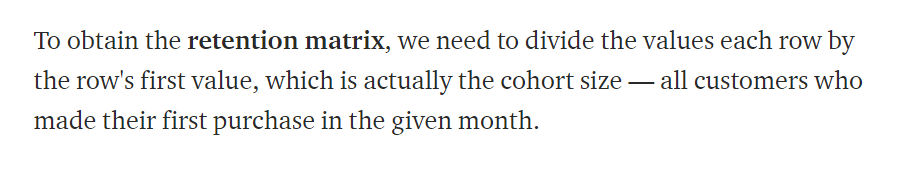

In [156]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

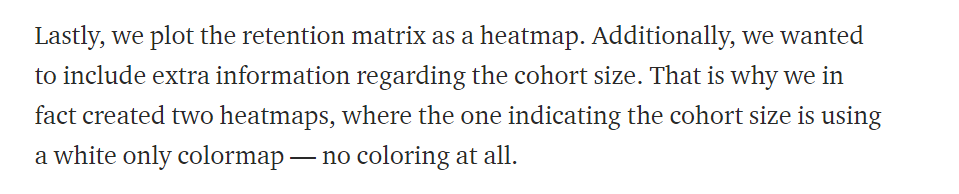

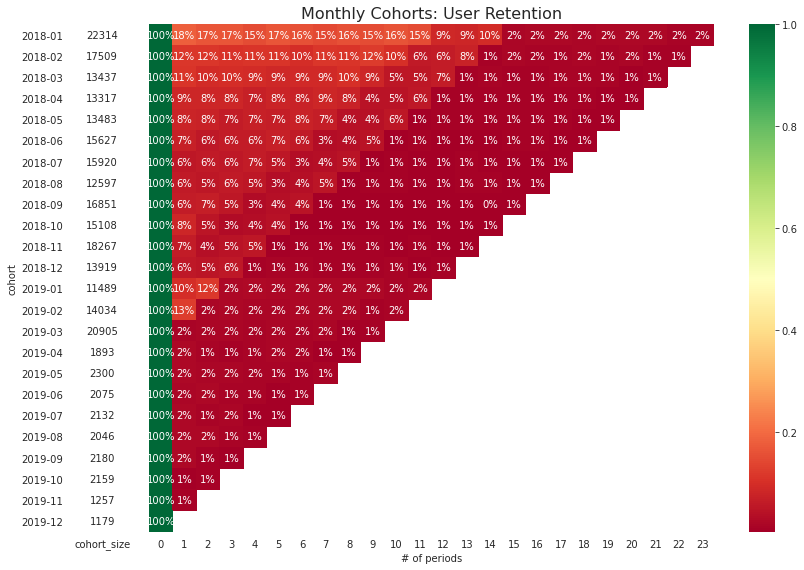

In [157]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

##  Insights

- User Retention is high in the first 3-4 months or certain threshold (almost 90-80%) quite stable
- after which there is a sharp decrease (alomst 50-40% users are lost)
- ~9% is the retention rate after an year
- becomes alomst 2% in 2nd year
- yearly-end user accuqistion is almost nill although
- beginning of each year accquistion is good (maybe due to some promotions/discounts on new year/ certain campaigns)
- Intrestingly first cohort (2018-01) does little bit better than others